In [1]:
import numpy as np 
import netCDF4 as nc
from scipy import stats
import matplotlib.pyplot as plt

In [20]:
PATH = "../data/1991TS"
FILENAME ="fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.4p4km.nc"

fn = f"{PATH}/{FILENAME}"
fg = nc.Dataset(fn)
    
lat = fg.variables["latitude"][:]
lng = fg.variables["longitude"][:]
wind_speed = fg.variables["wind_speed_of_gust"][:]

(array([1.8486687e+07, 2.8854551e+07, 2.0750709e+07, 8.7756030e+06,
        3.6210270e+06, 2.3272810e+06, 1.7169020e+06, 1.3588280e+06,
        1.0022030e+06, 7.0929200e+05, 4.9796900e+05, 3.7294000e+05,
        2.8445700e+05, 2.5110000e+05, 2.1512700e+05, 1.5589600e+05,
        8.4395000e+04, 3.6132000e+04, 8.9710000e+03, 3.3000000e+02]),
 array([ 0.375,  5.225, 10.075, 14.925, 19.775, 24.625, 29.475, 34.325,
        39.175, 44.025, 48.875, 53.725, 58.575, 63.425, 68.275, 73.125,
        77.975, 82.825, 87.675, 92.525, 97.375], dtype=float32),
 <BarContainer object of 20 artists>)

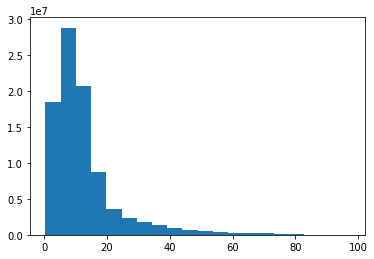

In [5]:
plt.hist(wind_speed.flatten(), bins=20)

In [27]:
std = np.std(wind_speed.flatten())
print("STD: ", std)
mean = np.mean(wind_speed.flatten())
print("Mean: ", mean)

STD:  6.170778
Mean:  10.291836


In [28]:
threshold = .3 * wind_speed.flatten().max()

In [63]:
target_z = (threshold - mean) / std

In [23]:
scalar = np.array(
                [[np.where(frame < wind_speed.max() * .3, np.nan, frame) for frame in ensemble ] for ensemble in wind_speed ])

In [33]:
scores = stats.zscore(wind_speed)

In [66]:
target_z

3.163404169627849

In [64]:
z_score = np.array(
    [[np.where(frame_score >= target_z, frame, np.nan) 
      for frame, frame_score in zip(ensemble, ensemble_score)] 
      for ensemble, ensemble_score in zip(wind_speed, stats.zscore(wind_speed, axis=None))])

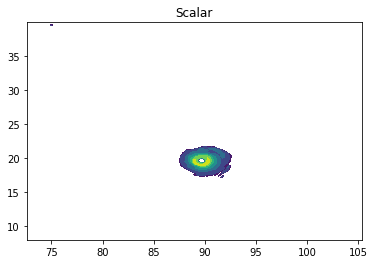

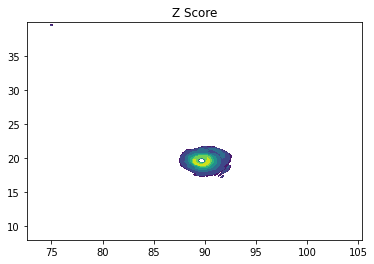

In [65]:
plt.contourf(lng, lat, scalar[0][8])
plt.title("Scalar")
plt.show()
plt.contourf(lng, lat, z_score[0][8])
plt.title("Z Score")
plt.show()

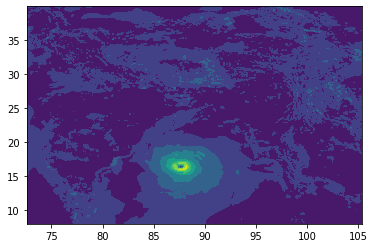

In [36]:
wind_frame = wind_speed[0][0]
plt.contourf(lng, lat, wind_frame)

`target_z` is the z_score of the max * .3, which is what I am using for my threshold

In [46]:
target_z = (wind_frame.max() * .3 - wind_frame.mean()) / wind_frame.std()
target_z

2.228704621234414

In [50]:
z_scores = (wind_frame - wind_frame.mean()) / wind_frame.std()

In [53]:
scalar_frame = np.where(wind_frame > .3 * wind_frame.max(), wind_frame, np.nan)
z_frame = np.where(stats.zscore(wind_frame, axis=None) > target_z, wind_frame, np.nan)

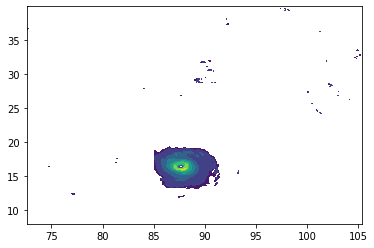

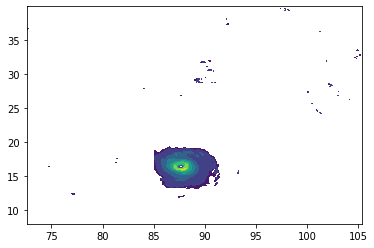

In [54]:
plt.contourf(lng, lat, scalar_frame)
plt.show()
plt.contourf(lng, lat, z_frame)
plt.show()